In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [123]:
year = ['2013','2014','2015','2016','2017','2018','2019']
list_league = np.array(['E0','F1','D1','I1','SP1'])
df = pd.DataFrame()
for item in year:
    for league in list_league:
        df = df.append(pd.read_csv("../../data/Dataset2/"+league+'_'+item+".csv"))
df = df.dropna(subset=['FTR'])
df.to_csv('full_df.csv', encoding='utf-8')

In [124]:
def prediction (odds1,odds2,odds3):
    if odds1<odds3 and odds1<odds2:
        predict = 0
    elif odds3<odds1 and odds3<odds2:
        predict = 1
    elif odds2< odds1 and odds2<odds3:
        predict=2
    else:
        predict=3
    return predict
def win_draw_loose(result):
    if result == 'H':
        points = 3
    elif result == 'D':
        points = 1
    elif result == 'A':
        points =0
    return points

def bookeh_right(result,prediction):
    if result == 3 and prediction == 0:
        is_right = True
    elif result == 0 and prediction == 1:
        is_right = True
    elif result == 1 and prediction ==2:
        is_right = True
    else:
        is_right = False
    return is_right
list_bookeh = np.array(['B365','BW','IW','PS','VC','WH'])
df['points'] = df['FTR'].apply(win_draw_loose)

for i in range(len(list_bookeh)):
    y = list_bookeh[i]
    df[y+'pred'] = df.apply(lambda x: prediction(x[y+'H'], x[y+'D'],x[y+'A']), axis=1)
    df[y+'right'] = df.apply(lambda x: bookeh_right(x['points'],x[y+'pred']),axis=1)
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BWpred,BWright,IWpred,IWright,PSpred,PSright,VCpred,VCright,WHpred,WHright
0,E0,17/08/13,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,...,0,False,0,False,0,False,0,False,0,False
1,E0,17/08/13,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,...,0,True,0,True,0,True,0,True,0,True
2,E0,17/08/13,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,...,1,False,1,False,1,False,1,False,1,False
3,E0,17/08/13,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,...,0,False,0,False,0,False,0,False,0,False
4,E0,17/08/13,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,...,1,True,1,True,1,True,1,True,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SP1,08/03/2020,Valladolid,Ath Bilbao,1.0,4.0,A,0.0,2.0,A,...,1,True,3,False,2,False,1,True,1,True
266,SP1,08/03/2020,Levante,Granada,1.0,1.0,D,1.0,0.0,H,...,0,False,0,False,0,False,0,False,0,False
267,SP1,08/03/2020,Villarreal,Leganes,1.0,2.0,A,1.0,0.0,H,...,0,False,0,False,0,False,0,False,0,False
268,SP1,08/03/2020,Betis,Real Madrid,2.0,1.0,H,1.0,1.0,D,...,1,False,1,False,1,False,1,False,1,False


In [125]:
df.groupby(['Div','HomeTeam']).sum().sort_values(by=['Div','points'],ascending=False)['points']

Div  HomeTeam    
SP1  Barcelona       335
     Ath Madrid      305
     Real Madrid     305
     Sevilla         270
     Ath Bilbao      238
                    ... 
D1   Darmstadt        33
     Nurnberg         30
     Paderborn        25
     Union Berlin     19
     Braunschweig     18
Name: points, Length: 148, dtype: int64

In [126]:
prediction_df = pd.DataFrame(columns=['Div','bookeh','true','false'])
for j in range(len(list_league)):
    temp_df = df[df['Div']== list_league[j]]
    true = np.array([])
    false = np.array([])
    for i in range(len(list_bookeh)):
        y = list_bookeh[i]
        true = np.append(true,temp_df[y+'right'].value_counts()[0])
        false = np.append(false,temp_df[y+'right'].value_counts()[1])
    d = {'Div':[list_league[j]]*len(list_bookeh),'bookeh':list_bookeh,'true': true,'false':false}
    temp = pd.DataFrame(data = d)
    temp['precision']= temp.true/(temp.true + temp.false)
    prediction_df =prediction_df.append(temp)  
prediction_df.sort_values(by=['precision','Div'],ascending=False)

,Div,bookeh,true,false,precision
2,D1,IW,1024.0,1036.0,0.497087
2,F1,IW,1272.0,1287.0,0.497069
5,F1,WH,1242.0,1317.0,0.485346
5,D1,WH,998.0,1062.0,0.484466
1,D1,BW,996.0,1064.0,0.483495
1,F1,BW,1234.0,1325.0,0.482220
0,D1,B365,991.0,1069.0,0.481068
4,D1,VC,988.0,1072.0,0.479612
3,F1,PS,1227.0,1332.0,0.479484
3,D1,PS,987.0,1073.0,0.479126


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


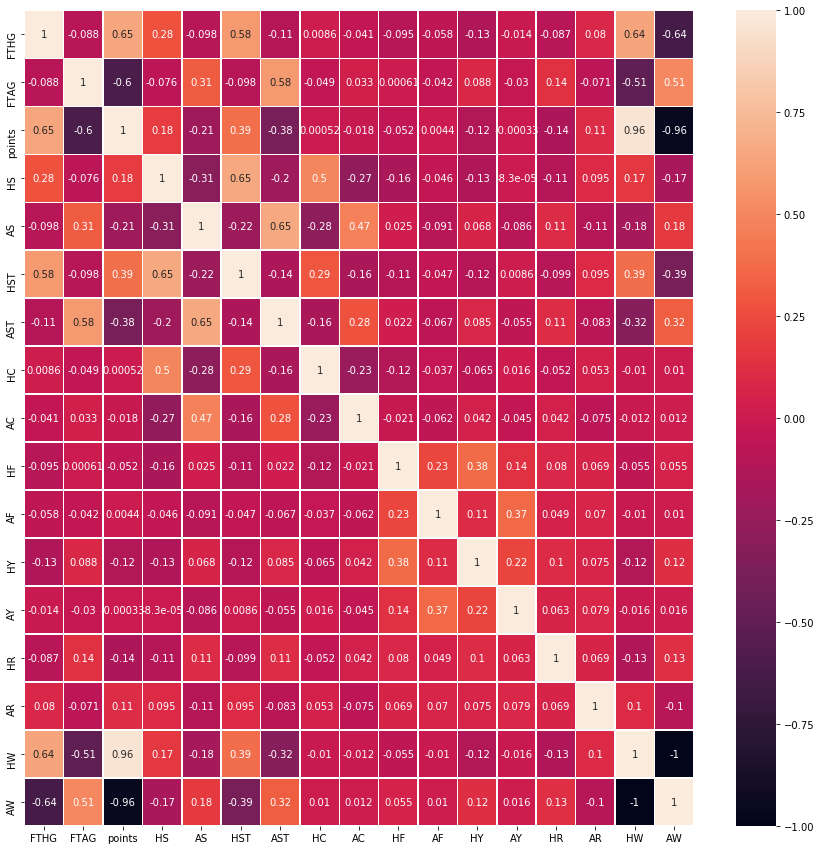

In [127]:
column_corr =['FTHG','FTAG','points','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']
df_corr = df[column_corr]
df_corr['HW']=df_corr['points'].apply(lambda x: 1 if x ==3 else 0)
df_corr['AW']=df_corr['points'].apply(lambda x: 0 if x ==3 else 1)
df_corr = df_corr.corr()
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax)

In [128]:
df['win']= df['FTR'].apply(lambda x: 1 if x=='H' else 0)
df['loose'] =  df['FTR'].apply(lambda x: 1 if x=='A' else 0)
df['draw'] = df['FTR'].apply(lambda x: 1 if x=='D' else 0)

In [129]:
win_df = df.groupby(['Div','HomeTeam']).sum().sort_values(by=['Div','points'],ascending=False)['win']

In [130]:
win_df.head()

Div  HomeTeam   
SP1  Barcelona      107
     Ath Madrid      93
     Real Madrid     96
     Sevilla         81
     Ath Bilbao      67
Name: win, dtype: int64

In [148]:
win_loose_df = df.groupby(['Div','HomeTeam','AwayTeam']).sum().sort_values(by=['Div','HomeTeam'])[['win','loose','draw']]
win_loose_df['total']= win_loose_df['win']+ win_loose_df['loose']+ win_loose_df['draw']
win_loose_df['ratio'] = win_loose_df['win']/win_loose_df['total']
win_loose_df= win_loose_df[win_loose_df['total']>=5]
win_loose_df= win_loose_df.query('ratio <= 0.25 or ratio >= 0.75')
win_loose_df['rivalry'] = win_loose_df['ratio'].apply(lambda x: 0 if x<=0.25  else 1 )
win_loose_df = win_loose_df.drop(columns= ['draw','total','ratio'])
win_loose_df

win  loose  rivalry
Div HomeTeam   AwayTeam                          
D1  Augsburg   Bayern Munich    1      5        0
               Dortmund         1      5        0
               Hamburg          4      1        1
               Leverkusen       0      4        0
               Schalke 04       1      3        0
...                           ...    ...      ...
SP1 Valencia   Malaga           4      0        1
    Villarreal Barcelona        0      3        0
               Granada          4      0        1
               Levante          5      0        1
               Real Madrid      1      2        0

[469 rows x 3 columns]

In [149]:
win_loose_df.to_csv('edge.csv', encoding='utf-8')

In [152]:
win_loose_df.drop(columns= ['win','loose']).to_csv('rivalries.csv',encoding='utf-8')

In [162]:
rivalries = pd.read_csv('../../data/Dataset2/rivalries.csv')
rivalries

,Div,HomeTeam,AwayTeam,rivalry
0,D1,Augsburg,Bayern Munich,0
1,D1,Augsburg,Dortmund,0
2,D1,Augsburg,Hamburg,1
3,D1,Augsburg,Leverkusen,0
4,D1,Augsburg,Schalke 04,0
...,...,...,...,...
464,SP1,Valencia,Malaga,1
465,SP1,Villarreal,Barcelona,0
466,SP1,Villarreal,Granada,1
467,SP1,Villarreal,Levante,1
